# Dijkstra (Rute Terbaik Untuk Anjangsana)

## Penjelasan

### Tujuan

Dataset ini merepresentasikan simulasi kegiatan Anjangsana (Silaturahmi) keluarga besar Bani Sutarjo saat Hari Raya Idul Fitri. Kami bertindak sebagai "AI Tour Planner" yang bertugas menyusun jadwal kunjungan paling efisien.

Masalah utamanya adalah:

- Keluarga besar tersebar di berbagai lokasi (Node).
- Waktu terbatas (hanya 8 jam/hari).
- Ada aturan prioritas (Kakek/Nenek harus didahulukan).
- Ada insentif (THR) yang hanya cair di kondisi tertentu.

### Kolom

- NIK = Identitas NIK setiap anggota keluarga.
- Nama = Identitas nama setiap anggota keluarga.
- TTL = Tempat tanggal lahir anggota keluarga
- Status Hubungan = Status dalam keluarga (Kepala Keluarga, Istri, Anak)
- Status Perkawinan = Status perkawinan setiap anggota keluarga
- Gaji = Pendapatan per bulan setiap orang
- Jenis Pekerjaan = Jenis pekerjaan setiap anggota keluarga
- Agama = Agama yang dianut keluarga
- Jenis Makanan = Makanan khas yang disajikan tuan rumah
- Kode Rumah = ID Unik rumah (A1, B1, C14, dst)
- Luas Rumah = Luas bangunan dalam meter persegi

## A. Data Preparation

### A.1 Import Libraries

In [537]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [538]:
try:
    df = pd.read_csv("Data Set SMK - Data Fix.csv")
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [539]:
df.head()

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah
0,3.359990e+15,Pak Sutajo,"jember, 28-07-1933",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,rawon,A1,280
1,3.357030e+15,Bu Sutajo,"jember, 12-07-1940",Istri,kawin,"Rp0,00",Tidak Bekerja,Islam,rawon,A1,280
2,3.356440e+15,Pak Jais,"jember, 01-07-1963",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,bakso,B1,240
3,3.355550e+15,Bu Jais,"jember, 15-03-1966",Istri,kawin,"Rp0,00",Tidak Bekerja,Islam,bakso,B1,240
4,3.354210e+15,Pak Pardi,"jember, 14-12-1965",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,rawon,B2,240


In [540]:
df.tail()

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah
70,3.354080e+15,Chintya,"Jember, 07 September 2008",anak,belum kawin,"Rp0,00",TIdak Bekerja,Islam,bakso,C13,230
71,3.359270e+15,Fania,"Jember, 11 Agustus 2010",anak,belum kawin,"Rp0,00",TIdak Bekerja,Islam,bakso,C13,230
72,3.354370e+15,Aji,"Jember, 19 November 2016",anak,belum kawin,"Rp0,00",TIdak Bekerja,Islam,bakso,C13,230
73,3.358450e+15,Mail,"Jember, 17 Februari 2000",anak,belum kawin,"Rp0,00",TIdak Bekerja,Islam,soto,C14,180
74,3.356020e+15,Susanti,"Jember, 27 Februari 2007",anak,belum kawin,"Rp0,00",TIdak Bekerja,Islam,soto,C14,180


### A.4 Melihat Dimensi Data

In [541]:
df.shape

(75, 11)

### A.5 Melihat Informasi Data

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIK                75 non-null     float64
 1   Nama               75 non-null     object 
 2   TTL                75 non-null     object 
 3   Status Hubungan    75 non-null     object 
 4   Status Perkawinan  75 non-null     object 
 5   Gaji               75 non-null     object 
 6   Jenis Pekerjaan    75 non-null     object 
 7   Agama              75 non-null     object 
 8   Jenis Makanan      75 non-null     object 
 9   Kode Rumah         75 non-null     object 
 10  Luas Rumah         75 non-null     int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 6.6+ KB


### A.6 Cek Data Duplikat

In [543]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [544]:
df.isna().sum()

NIK                  0
Nama                 0
TTL                  0
Status Hubungan      0
Status Perkawinan    0
Gaji                 0
Jenis Pekerjaan      0
Agama                0
Jenis Makanan        0
Kode Rumah           0
Luas Rumah           0
dtype: int64

### A.8 Cek Statistik Data

In [545]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
NIK,75.00,3356231866666666.50,2017711235690.24,3352750000000000.00,3354405000000000.00,3356150000000000.00,3357795000000000.00,3359990000000000.00
Luas Rumah,75.00,194.80,48.75,100.00,180.00,200.00,235.00,280.00


## B. Data Preprocessing

### B.1 Membersihkan Kolom Gaji

- Menghapus "Rp", " . ", dll

In [546]:
df['Gaji'].unique()

array(['Rp3.000.000,00', 'Rp0,00', 'Rp2.789.583,37', 'Rp6.430.981,43',
       'Rp2.727.962,40', 'Rp12.574.754,56', 'Rp687.021,57',
       'Rp6.166.126,13', 'Rp9.489.851,35', 'Rp6.548.181,76',
       'Rp3.766.594,06', 'Rp2.833.458,87', 'Rp624.887,67',
       'Rp6.320.220,80', 'Rp5.798.308,18', 'Rp3.711.982,69',
       'Rp7.896.697,79', 'Rp2.803.120,67', 'Rp9.207.626,58',
       'Rp2.865.885,14', 'Rp9.175.753,85', 'Rp6.587.272,58',
       'Rp6.695.085,78', 'Rp8.302.140,05', 'Rp5.322.783,11',
       'Rp5.102.050,36', 'Rp6.753.323,84', 'Rp7.724.264,74',
       'Rp5.825.696,87', 'Rp7.904.942,89', 'Rp1.077.428,32'], dtype=object)

In [547]:
def clean_gaji(df):
    if isinstance(df, str):
        return int(df.replace('Rp', '').replace('.', '').split(',')[0])
    return df

In [548]:
df['Gaji_Clean'] = df['Gaji'].apply(clean_gaji)

In [549]:
dfgpr = df.groupby('Kode Rumah')['Gaji_Clean'].sum()

In [550]:
df['Gaji_Total'] = df['Kode Rumah'].map(dfgpr)

### B.2 Umur Anggota Keluarga

- Tahun sekarang - tahun tanggal lahir anggota keluarga

In [551]:
def umur(ttl):
    try:
        tahun = int(str(ttl).strip()[-4:]) 
        return 2023 - tahun
    except:
        return 25

In [552]:
df['Umur'] = df['TTL'].apply(umur)

In [553]:
df.head() 

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah,Gaji_Clean,Gaji_Total,Umur
0,3.359990e+15,Pak Sutajo,"jember, 28-07-1933",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,rawon,A1,280,3000000,3000000,90
1,3.357030e+15,Bu Sutajo,"jember, 12-07-1940",Istri,kawin,"Rp0,00",Tidak Bekerja,Islam,rawon,A1,280,0,3000000,83
2,3.356440e+15,Pak Jais,"jember, 01-07-1963",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,bakso,B1,240,3000000,3000000,60
3,3.355550e+15,Bu Jais,"jember, 15-03-1966",Istri,kawin,"Rp0,00",Tidak Bekerja,Islam,bakso,B1,240,0,3000000,57
4,3.354210e+15,Pak Pardi,"jember, 14-12-1965",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,rawon,B2,240,3000000,3000000,58


### B.3 Syarat THR

- Usia dibawah 17 tahun atau tidak bekerja

In [554]:
def syarat_thr(row):
    status = str(row['Status Hubungan']).lower().strip()
    kerja = str(row['Jenis Pekerjaan']).lower().strip()
    usia = row['Umur']
    
    if status == 'anak' and (usia < 17 or kerja in ['Tidak Bekerja']):
        return 1
    return 0

In [555]:
df['Anak_THR'] = df.apply(syarat_thr, axis=1)

### B.4 Menambahkan Kolom THR

- THR = Jika Gaji Seluruh Anggota Keluarga lebih dari 10 Juta
- Besaran THR untuk masing-masing Anak = 50 Ribu

In [556]:
def uang_thr(gaji):
    if gaji > 10000000:
        return 50000
    else:
        return 0

In [557]:
df['Uang_THR'] = df['Gaji_Total'].apply(uang_thr)

In [558]:
df.head()

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah,Gaji_Clean,Gaji_Total,Umur,Anak_THR,Uang_THR
0,3.359990e+15,Pak Sutajo,"jember, 28-07-1933",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,rawon,A1,280,3000000,3000000,90,0,0
1,3.357030e+15,Bu Sutajo,"jember, 12-07-1940",Istri,kawin,"Rp0,00",Tidak Bekerja,Islam,rawon,A1,280,0,3000000,83,0,0
2,3.356440e+15,Pak Jais,"jember, 01-07-1963",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,bakso,B1,240,3000000,3000000,60,0,0
3,3.355550e+15,Bu Jais,"jember, 15-03-1966",Istri,kawin,"Rp0,00",Tidak Bekerja,Islam,bakso,B1,240,0,3000000,57,0,0
4,3.354210e+15,Pak Pardi,"jember, 14-12-1965",Kepala Keluarga,kawin,"Rp3.000.000,00",Pensiunan,Islam,rawon,B2,240,3000000,3000000,58,0,0


### B.5 Aggregasi Data Per-Rumah

- Hitung jumlah anak di dalam keluarga
- Ambil tarif THR dari kepala keluarga (max)
- Menggabungkan fitur-fitur penting menjadi 1 dataframe

In [559]:
def aggregasi_rumah(df):
    anak = df['Anak_THR'].sum()
    tarif = df['Uang_THR'].max()
    
    return pd.Series({
        'Penghuni': df['Nama'].iloc[0],
        'Luas_Rumah': df['Luas Rumah'].iloc[0],
        'Total_THR': anak * tarif,
        'Anak_THR': anak,
        'Durasi_Kunjungan': 30 if df['Luas Rumah'].iloc[0] >= 200 else 15
    })

In [560]:
df_rumah = df.groupby('Kode Rumah').apply(aggregasi_rumah, include_groups=False).reset_index()
df_rumah =df_rumah.set_index('Kode Rumah')

In [561]:
df_rumah

,Penghuni,Luas_Rumah,Total_THR,Anak_THR,Durasi_Kunjungan
Kode Rumah,,,,,
A1,Pak Sutajo,280,0,0,30
B1,Pak Jais,240,0,0,30
B2,Pak Pardi,240,0,0,30
B3,Pak Udin,260,0,0,30
C1,Pak Suprapto,200,0,0,30
C10,Pak Mariono,180,50000,1,15
C11,Pak Mardi,100,0,0,15
C12,Pak Karel,110,0,0,15
C13,Pak Tiono,230,150000,3,30


### B.6 List Prioritas Keluarga

- Prioritas keluarga yang dikunjungi

In [562]:
prioritas_1 = ['A1']

prioritas_2 = ['B1', 'B2', 'B3']

prioritas_3 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

urutan_prioritas = [prioritas_1, prioritas_2, prioritas_3]

### B.7 Graph Data

- Membuat Graph (Adjacency List/Dictionary) agar model bisa membaca datanya

#### Graph Jarak (Meter)

In [563]:
graph_dist = {
    'A1' : {'B2': 100, 'C13' : 300, 'C1': 300, 'C4': 400, 'C6' : 400, 'C7': 400},
    'B1' : {'C5': 200, 'C9': 200, 'C14': 200},
    'B2' : {'A1' : 100, 'C3' : 100, 'C5': 200, 'C12' : 200},
    'B3' : {'C10': 100, 'C11' : 400},
    'C1' : {'A1' : 300, 'C7' : 300, 'C2' : 400, 'C6': 400},
    'C2' : {'C1' : 400, 'C8': 400},
    'C3' : {'B2' : 100, 'C10' : 200, 'C11' : 200, 'C5': 400, 'C9' : 400},
    'C4' : {'C13' : 300, 'A1' : 400, 'C7': 400},
    'C5' : {'C6': 100, 'B1' : 200, 'B2': 150, 'C3' : 400}, 
    'C6' : {'C5' : 100, 'A1' : 400, 'C1': 400},
    'C7' : {'C13' : 100, 'A1' : 400, 'C1': 300, 'C4' : 400},
    'C8' : {'C2' : 400},    
    'C9' : {'B1' : 200, 'C3' : 400},
    'C10': {'B3' : 100, 'C3' : 200},
    'C11': {'B3' : 400, 'C3' : 200},
    'C12': {'B2' : 200},
    'C13': {'C7' : 100, 'A1' : 300, 'C4' : 300},
    'C14': {'B1' : 200}
}

#### Graph Waktu (Menit)

In [564]:
graph_time = {
    'A1' : {'B2': 10, 'C13' : 20, 'C1': 20, 'C4': 25, 'C6' : 25, 'C7': 25},
    'B1' : {'C5': 15, 'C9': 15, 'C14': 15},
    'B2' : {'A1' : 10, 'C3' : 10, 'C5': 15, 'C12' : 15},
    'B3' : {'C10': 10, 'C11' : 25},
    'C1' : {'A1' : 20, 'C7' : 20, 'C2' : 25, 'C6': 25},
    'C2' : {'C1' : 25, 'C8': 25},
    'C3' : {'B2' : 10, 'C10' : 15, 'C11' : 15, 'C5': 25, 'C9' : 25},
    'C4' : {'C13' : 20, 'A1' : 25, 'C7': 25},
    'C5' : {'C6': 10, 'B1' : 15, 'B2': 15, 'C3' : 25},
    'C6' : {'C5' : 10, 'A1' : 25, 'C1': 25},
    'C7' : {'C13' : 10, 'A1' : 25, 'C1': 20, 'C4' : 25},
    'C8' : {'C2' : 25},
    'C9' : {'B1' : 15, 'C3' : 25},
    'C10': {'B3' : 10, 'C3' : 15},
    'C11': {'B3' : 25, 'C3' : 15},
    'C12': {'B2' : 15},
    'C13': {'C7' : 10, 'A1' : 20, 'C4' : 20},
    'C14': {'B1' : 15}
}

## C. Modelling

### C.1 Fungsi Jarak Dijkstra

In [565]:
def dijkstra_lengkap(graph, start_node):
    distances = {node: float('inf') for node in graph}
    distances[start_node] = 0
    jejak = {node: None for node in graph} # Untuk melacak rute
    
    unvisited = list(graph.keys())
    
    while unvisited:
        curr = None
        min_val = float('inf')
        for node in unvisited:
            if distances[node] < min_val:
                min_val = distances[node]
                curr = node
        
        if curr is None: break
        unvisited.remove(curr)
        
        for neighbor, weight in graph[curr].items():
            new_dist = distances[curr] + weight
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                jejak[neighbor] = curr # Catat: Ke neighbor lewat curr
                
    return distances, jejak

def get_rute(jejak, start, end):
    path = []
    curr = end
    while curr is not None:
        path.insert(0, curr)
        if curr == start: break
        curr = jejak[curr]
    return " -> ".join(path) if path[0] == start else "Putus"

### C.2 Fungsi Simulasi Anjangsana

In [566]:
def simulasi_anjangsana(start_node, df_rumah, graph_dist, graph_time, prioritas):
    posisi = start_node
    sisa_waktu = 480
    hari = 1
    visited = [start_node]
    total_thr = 0
    logs = []
    
    print(f"START: {start_node} | Hari: {hari} | Sisa Waktu: {sisa_waktu}")
    print("-" * 50)
    
    while True:
        # 1. Pilih Prioritas
        pool = []
        level = ""
        for i, grp in enumerate(prioritas):
            sisa = [n for n in grp if n not in visited]
            if sisa:
                pool = sisa
                level = f"Level {i+1}"
                break
        
        if not pool:
            print("Semua Selesai!")
            break
            
        # 2. Hitung Jarak & Rute dari posisi sekarang
        jarak, jejak = dijkstra_lengkap(graph_dist, posisi)
        
        # 3. Cari target terdekat
        tujuan = None
        min_dist = float('inf')
        for node in pool:
            if node in jarak and jarak[node] < min_dist:
                min_dist = jarak[node]
                tujuan = node
                
        if not tujuan: break
        
        # 4. Hitung Waktu & Ambil Data
        rute_teks = get_rute(jejak, posisi, tujuan) 
        
        waktu_jalan_dict, _ = dijkstra_lengkap(graph_time, posisi)
        waktu_jalan = waktu_jalan_dict[tujuan]
        
        try:
            waktu_tamu = df_rumah.loc[tujuan, 'Durasi_Kunjungan']
            uang = df_rumah.loc[tujuan, 'Total_THR']
        except:
            print(f"Error Data di {tujuan}"); break
            
        cost = waktu_jalan + waktu_tamu
        
        # --- MODIFIKASI: Logika Ganti Hari ---
        if sisa_waktu < cost:
            hari += 1
            sisa_waktu = 480 # Reset Waktu
            print(f"\n--- Ganti Hari ke-{hari} ---")
            
            # Cek jika seharian penuh pun tidak cukup
            if sisa_waktu < cost:
                print(f"Skip {tujuan}: Waktu tidak cukup.")
                visited.append(tujuan)
                continue

        # Eksekusi (Pindah)
        sisa_waktu -= cost
        total_thr += uang
        visited.append(tujuan)
        
        print(f"Ke {tujuan} ({level})")
        print(f"   Rute: {rute_teks}")
        print(f"   THR: Rp {uang:,}")
        print(f"   Sisa Waktu: {sisa_waktu}")
        
        logs.append({
            'Hari': hari, # TAMBAHAN 2: Catat Hari
            'Dari': posisi, 'Ke': tujuan, 'Rute': rute_teks, 
            'THR': uang, 'Sisa Waktu': sisa_waktu
        })
        posisi = tujuan
            
    return pd.DataFrame(logs), total_thr

### C.3 Run Simulasi Anjangsana

In [567]:
df_hasil, total_uang = simulasi_anjangsana(
    start_node='C14', 
    df_rumah=df_rumah, 
    graph_dist=graph_dist, 
    graph_time=graph_time,
    prioritas=urutan_prioritas
)

print(f"\nTotal THR Keluar: Rp {total_uang:,}")
df_hasil

START: C14 | Hari: 1 | Sisa Waktu: 480
--------------------------------------------------
Ke A1 (Level 1)
   Rute: C14 -> B1 -> C5 -> B2 -> A1
   THR: Rp 0
   Sisa Waktu: 395
Ke B2 (Level 2)
   Rute: A1 -> B2
   THR: Rp 0
   Sisa Waktu: 355
Ke B1 (Level 2)
   Rute: B2 -> C5 -> B1
   THR: Rp 0
   Sisa Waktu: 295
Ke B3 (Level 2)
   Rute: B1 -> C5 -> B2 -> C3 -> C10 -> B3
   THR: Rp 0
   Sisa Waktu: 200
Ke C10 (Level 3)
   Rute: B3 -> C10
   THR: Rp 50,000
   Sisa Waktu: 175
Ke C3 (Level 3)
   Rute: C10 -> C3
   THR: Rp 0
   Sisa Waktu: 145
Ke C11 (Level 3)
   Rute: C3 -> C11
   THR: Rp 0
   Sisa Waktu: 115
Ke C5 (Level 3)
   Rute: C11 -> C3 -> B2 -> C5
   THR: Rp 0
   Sisa Waktu: 45
Ke C6 (Level 3)
   Rute: C5 -> C6
   THR: Rp 0
   Sisa Waktu: 20

--- Ganti Hari ke-2 ---
Ke C1 (Level 3)
   Rute: C6 -> C1
   THR: Rp 0
   Sisa Waktu: 425
Ke C7 (Level 3)
   Rute: C1 -> C7
   THR: Rp 0
   Sisa Waktu: 375
Ke C13 (Level 3)
   Rute: C7 -> C13
   THR: Rp 150,000
   Sisa Waktu: 335
Ke C4 (Level 3

,Hari,Dari,Ke,Rute,THR,Sisa Waktu
0,1,C14,A1,C14 -> B1 -> C5 -> B2 -> A1,0,395
1,1,A1,B2,A1 -> B2,0,355
2,1,B2,B1,B2 -> C5 -> B1,0,295
3,1,B1,B3,B1 -> C5 -> B2 -> C3 -> C10 -> B3,0,200
4,1,B3,C10,B3 -> C10,50000,175
5,1,C10,C3,C10 -> C3,0,145
6,1,C3,C11,C3 -> C11,0,115
7,1,C11,C5,C11 -> C3 -> B2 -> C5,0,45
8,1,C5,C6,C5 -> C6,0,20
9,2,C6,C1,C6 -> C1,0,425


### C.4 Visualisasi Graph Node Anjangsana

In [568]:
import matplotlib.pyplot as plt

def visualisasi_graph(graph_dist):
    plt.figure(figsize=(16, 12))
    
    posisi = {
        # Kelompok Atas A1
        'A1': (6, 11),
        
        'B1': (2, 9),
        'B2': (6, 9),
        'B3': (10, 9),
        
        # Kelompok Kiri B1
        'C14': (0.5, 7.5),
        'C13': (1, 6),
        'C7':  (2.5, 7),
        'C1':  (3.5, 5.5),
        
        # Kelompok Tengah B2
        'C4':  (4.5, 7),
        'C5':  (6, 6.5),
        'C12': (7.5, 7),
        'C6':  (5, 4.5),
        
        # Kelompok Kanan B3
        'C3':  (9, 6), 
        'C11': (10.5, 7),
        'C10': (11.5, 5.5),
        'C9':  (8, 3.5),   
        
        # Kelompok Bawah B2
        'C2':  (6, 2),
        'C8':  (6, 0.5) 
    }
    
    for node in graph_dist.keys():
        if node not in posisi: posisi[node] = (6, 6)

    # GAMBAR GARIS & JARAK
    garis_sudah_digambar = set()
    
    for node_asal, tetangga in graph_dist.items():
        if node_asal not in posisi: continue
        x1, y1 = posisi[node_asal]
        
        for node_tujuan, jarak in tetangga.items():
            if node_tujuan not in posisi: continue
            
            kunci_garis = tuple(sorted([node_asal, node_tujuan]))
            if kunci_garis in garis_sudah_digambar: continue
            garis_sudah_digambar.add(kunci_garis)
            
            x2, y2 = posisi[node_tujuan]
            
            # Garis Jalur
            plt.plot([x1, x2], [y1, y2], c='#AAAAAA', linestyle='-', linewidth=1, zorder=1)
            
            # Teks Jarak
            mid_x = (x1 + x2) / 2
            mid_y = (y1 + y2) / 2
            
            plt.text(mid_x, mid_y, str(jarak), fontsize=9, color='darkred', 
                     ha='center', va='center', weight='bold',
                     bbox=dict(facecolor='white', edgecolor='lightgray', alpha=1, pad=0.4))

    # GAMBAR NODE
    for node, (x, y) in posisi.items():
        if node.startswith('A'): 
            warna, size = '#FF9999', 2200
        elif node.startswith('B'): 
            warna, size = '#99CCFF', 1900
        else: 
            warna, size = '#99FF99', 1600
            
        plt.scatter(x, y, s=size, c=warna, edgecolors='#555555', linewidth=1.5, zorder=2)
        plt.text(x, y, node, fontsize=11, fontweight='bold', color='#222222', 
                 ha='center', va='center', zorder=3)

    plt.title("Peta Visualisasi Anjangsana (Jarak Meter)", fontsize=20, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

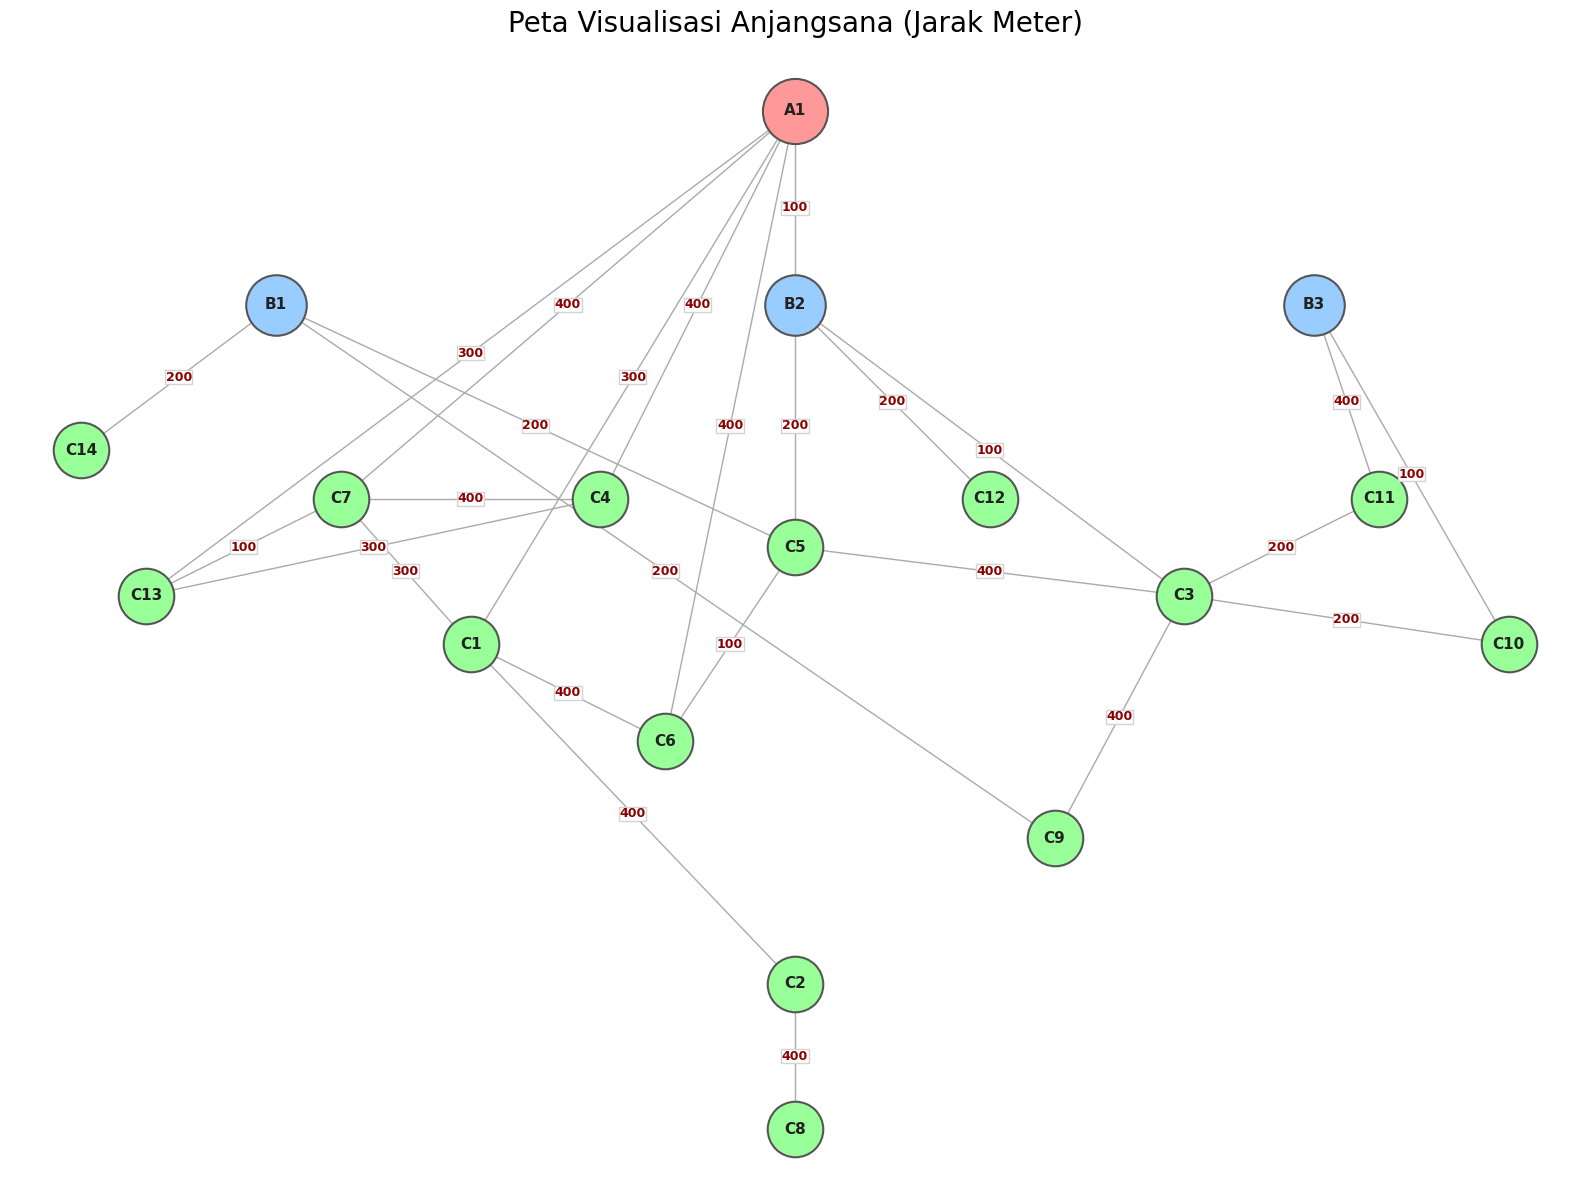

In [569]:
visualisasi_graph(graph_dist)

## D. GUI

### D.1 GUI Tkinter

In [570]:
df_rumah

,Penghuni,Luas_Rumah,Total_THR,Anak_THR,Durasi_Kunjungan
Kode Rumah,,,,,
A1,Pak Sutajo,280,0,0,30
B1,Pak Jais,240,0,0,30
B2,Pak Pardi,240,0,0,30
B3,Pak Udin,260,0,0,30
C1,Pak Suprapto,200,0,0,30
C10,Pak Mariono,180,50000,1,15
C11,Pak Mardi,100,0,0,15
C12,Pak Karel,110,0,0,15
C13,Pak Tiono,230,150000,3,30


In [571]:
import tkinter as tk
from tkinter import *
from tkinter import ttk, messagebox

# --- 1. PERSIAPAN DATA (GLOBAL) ---
# Ambil list semua node untuk Dropdown
list_nodes = sorted(list(graph_dist.keys()))

# Variabel Global untuk menyimpan status
current_waktu = 0
current_thr = 0
current_hari = 1
posisi_terakhir = None
log_history = ""

# --- 2. FUNGSI LOGIKA ---
def tambah_rute():
    global current_waktu, current_thr, posisi_terakhir, log_history, current_hari
    
    # Ambil data dari input
    start = combo_dari.get()
    end = combo_ke.get()
    
    # Validasi Input
    if start == "" or end == "":
        messagebox.showwarning("Peringatan", "Pilih lokasi Asal dan Tujuan!")
        return
    
    if start == end:
        messagebox.showwarning("Peringatan", "Asal dan Tujuan tidak boleh sama!")
        return

    # A. Hitung Waktu Perjalanan (Dijkstra)
    # Kita panggil fungsi dijkstra_lengkap yang sudah kamu buat sebelumnya
    waktu_dist, _ = dijkstra_lengkap(graph_time, start)
    travel_time = waktu_dist[end]
    
    # Cek jika tidak ada jalur
    if travel_time == float('inf'):
        messagebox.showerror("Error", f"Tidak ada jalan dari {start} ke {end}!")
        return

    # B. Ambil Data Rumah (Durasi Tamu & THR)
    try:
        # Ambil data dari DataFrame df_rumah
        visit_time = df_rumah.loc[end, 'Durasi_Kunjungan']
        uang_thr = df_rumah.loc[end, 'Total_THR']
    except Exception as e:
        messagebox.showerror("Error Data", f"Data rumah {end} bermasalah: {e}")
        return
    
    total_cost = travel_time + visit_time
    estimasi_waktu = current_waktu + total_cost
    
    # C. Cek Batas Waktu 480 Menit
    if estimasi_waktu > 480:
        sisa = 480 - current_waktu
        msg = (f"WAKTU HABIS!\n"
               f"Sisa waktu: {sisa} menit.\n"
               f"Butuh: {total_cost} menit.\n"
               f"Silakan klik 'GANTI HARI' untuk lanjut.")
        messagebox.showwarning("Gagal", msg)
        return

    # D. Update Status Global
    current_waktu = estimasi_waktu
    current_thr += uang_thr
    posisi_terakhir = end
    
    # Update Log String
    rute_baru = f"Hari {current_hari}: {start} -> {end} | +{total_cost} mnt | THR: Rp {uang_thr:,}\n"
    log_history += rute_baru
    
    # E. Update Tampilan GUI
    lbl_waktu_val.config(text=f"{current_waktu} / 480 menit")
    lbl_thr_val.config(text=f"Rp {current_thr:,}")
    
    # Masukkan ke Text Area (History)
    text_log.config(state=NORMAL) # Buka kunci
    text_log.insert(END, rute_baru)
    text_log.see(END) # Scroll ke paling bawah
    text_log.config(state=DISABLED) # Kunci lagi
    
    # F. Auto-Set Input Berikutnya
    # Biar gak capek milih, 'Dari' otomatis jadi 'Ke' yang barusan
    combo_dari.set(end)
    combo_ke.set("")

def ganti_hari():
    global current_waktu, current_hari, posisi_terakhir
    
    # Reset Waktu, tapi THR dan Posisi lanjut
    current_waktu = 0
    current_hari += 1
    
    # Update UI
    lbl_waktu_val.config(text=f"0 / 480 menit")
    
    # Beri tanda garis di log
    text_log.config(state=NORMAL)
    text_log.insert(END, f"--- GANTI HARI KE-{current_hari} ---\n")
    text_log.config(state=DISABLED)
    
    messagebox.showinfo("Reset", f"Masuk Hari ke-{current_hari}. Waktu kembali 0.")


# --- 3. GUI UTAMA ---
root = tk.Tk()
root.title("Simulasi Anjangsana - Bani Sutarjo")
root.geometry("500x700")
root.config(bg="#1e3d59") # Warna Navy

# --- HEADER ---
header = Frame(root, bg="#f5f0e1") # Warna Cream
header.pack(fill=X)
Label(header, text="Anjangsana Planner", font=('Arial', 18, 'bold'), fg='#1e3d59', bg="#f5f0e1").pack(pady=5)
Label(header, text="Optimasi Rute & THR", font=('Arial', 12), fg='#1e3d59', bg="#f5f0e1").pack(pady=(0,5))

main = Frame(root, bg="#1e3d59")
main.pack(pady=10)

# --- BAGIAN INPUT ---
aturan = Frame(main, bg="#1e3d59")
aturan.pack()

# Input: DARI
Label(aturan, text="Lokasi Asal (Dari):", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(10,0))
# Pakai Combobox biar user tinggal pilih node, gak perlu ketik manual
combo_dari = ttk.Combobox(aturan, values=list_nodes, width=30)
combo_dari.pack(pady=5)

# Input: KE
Label(aturan, text="Lokasi Tujuan (Ke):", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(10,0))
combo_ke = ttk.Combobox(aturan, values=list_nodes, width=30)
combo_ke.pack(pady=5)

# --- BAGIAN BUTTON ---
hasil = Frame(root, bg="#1e3d59")
hasil.pack(pady=20)

# Tombol Tambah
btn_add = Button(hasil, text='TAMBAH RUTE', font=('Arial', 11, 'bold'), bg='#ff6e40', fg='white', command=tambah_rute)
btn_add.pack(ipadx=20, ipady=5, side=LEFT, padx=10)

# Tombol Ganti Hari
btn_reset = Button(hasil, text='GANTI HARI', font=('Arial', 11, 'bold'), bg='#17a2b8', fg='white', command=ganti_hari)
btn_reset.pack(ipadx=20, ipady=5, side=RIGHT, padx=10)

# --- BAGIAN STATUS (WAKTU & THR) ---
status_frame = Frame(root, bg="#1e3d59")
status_frame.pack(pady=10)

# Label Waktu
Label(status_frame, text="Total Waktu Hari Ini:", font=('Arial', 10), fg='white', bg="#1e3d59").grid(row=0, column=0, padx=20)
lbl_waktu_val = Label(status_frame, text="0 / 480 menit", font=('Arial', 14, 'bold'), fg='#ffc13b', bg="#1e3d59")
lbl_waktu_val.grid(row=1, column=0, padx=20)

# Label THR
Label(status_frame, text="Total THR Didapat:", font=('Arial', 10), fg='white', bg="#1e3d59").grid(row=0, column=1, padx=20)
lbl_thr_val = Label(status_frame, text="Rp 0", font=('Arial', 14, 'bold'), fg='#00ff00', bg="#1e3d59")
lbl_thr_val.grid(row=1, column=1, padx=20)

# --- BAGIAN LOG HISTORY ---
Label(root, text="Riwayat Perjalanan:", font=('Arial', 10, 'bold'), fg='white', bg="#1e3d59").pack(pady=(20, 5))

# Text Area dengan Scrollbar
frame_log = Frame(root)
frame_log.pack(padx=20, pady=(0, 20), fill=BOTH, expand=True)

scrollbar = Scrollbar(frame_log)
scrollbar.pack(side=RIGHT, fill=Y)

text_log = Text(frame_log, height=10, width=50, font=('Consolas', 9), state=DISABLED)
text_log.pack(side=LEFT, fill=BOTH, expand=True)

text_log.config(yscrollcommand=scrollbar.set)
scrollbar.config(command=text_log.yview)

root.mainloop()

## Kesimpulan

#### Simulasi ini bertujuan memaksimalkan kunjungan silaturahmi. Kami berjalan dari satu rumah ke rumah lain. Setiap hari dibatasi 8 jam. Jika waktu habis, kami lanjut besoknya.

1. Keluarga yang memberi THR (Tanpa Syarat Umur & Pekerjaan):
- Keluarga Pak Suprapto (C1) = Rp 100.000
- Keluarga Pak Qodri (C4) = Rp 100.000
- Keluarga Pak Fahri (C9) = Rp 100.000
- Keluarga Pak Mariono (C10) = Rp 150.000
- Keluarga Pak Joko (C5) = Rp 150.000
- Keluarga Pak Tiono (C13) = Rp 150.000
- Keluarga Pak Fahmi (C2) = Rp 150.000

2. Keluarga yang memberi THR (Dengan Syarat Umur & Pekerjaan):
- Keluarga Pak Mariono (C10) = Rp 50.000
- Keluarga Pak Tiono (C13) = Rp 150.000
- Keluarga Pak Fahri (C9) = Rp 100.000

3. Kami dapat ber-silaturahmi kepada setiap keluarga (rumah) yang ada di desa dalam waktu total 3 Hari / 17 Jam / 1015 Menit

4. Makanan yang disuguhkan sebanyak 2 kali berturut - turut adalah:
- A1 dan B2 (Rawon)
- C3 dan C11 (Sate)
- c4 dan c13 (Bakso)

5. Simulasi rute kunjungan ke setiap rumah anggota keluarga:

In [572]:
df_hasil

,Hari,Dari,Ke,Rute,THR,Sisa Waktu
0,1,C14,A1,C14 -> B1 -> C5 -> B2 -> A1,0,395
1,1,A1,B2,A1 -> B2,0,355
2,1,B2,B1,B2 -> C5 -> B1,0,295
3,1,B1,B3,B1 -> C5 -> B2 -> C3 -> C10 -> B3,0,200
4,1,B3,C10,B3 -> C10,50000,175
5,1,C10,C3,C10 -> C3,0,145
6,1,C3,C11,C3 -> C11,0,115
7,1,C11,C5,C11 -> C3 -> B2 -> C5,0,45
8,1,C5,C6,C5 -> C6,0,20
9,2,C6,C1,C6 -> C1,0,425


6. Jika ada 2 orang keluarga yang berhak mendapatkan THR, lalu dia berkunjung ke seluruh rumah anggota keluarga, potensi pendapatan THR nya adalah:

In [573]:
hasil = df_hasil['THR'].values * 2
total = hasil.sum()
print(f"Rp. {total}")

Rp. 600000
